## Exercise 2 - Shor's algorithm
### Historical background
In computing, we often measure the performance of an algorithm by how it grows with the size of the input problem. For example, addition has an algorithm that grows linearly with the size of the numbers we're adding. There are some computing problems for which the best algorithms we have grow exponentially with the size of the input, and this means inputs with a relatively modest size are too big to solve using any computer on earth. We're so sure of this, much of the internet's security depends on certain problems being unsolvable.

In 1994, Peter Shor showed that it’s possible to factor a number into its primes efficiently on a quantum computer. This is big news, as the best classical algorithm we know of is one of these algorithms that grows exponentially. And in fact, RSA encryption) relies on factoring large enough numbers being infeasible. To factor integers that are too big for our current classical computers will require millions of qubits and gates, and these circuits are far too big to run on today’s quantum computers successfully.

So how did Lieven M.K. Vandersypen, Matthias Steffen, Gregory Breyta, Costantino S. Yannoni, Mark H. Sherwood and Isaac L. Chuang manage to factor 15 on a quantum computer, all the way back in 2001?![2]

The difficulty in creating circuits for Shor’s algorithm is creating the circuit that computes a controlled $ay \bmod N$. While we know how to create these circuits using a polynomial number of gates, these are still too large for today’s computers. Fortunately, if we know some information about the problem a priori, then we can sometimes ‘cheat’ and create more efficient circuits.

To run this circuit on the hardware available to them, the authors of the above paper found a very simple circuit that performed $7y \bmod 15$. This made the circuit small enough to run on their hardware. By the end of this exercise, you will have created a circuit for $35y \bmod N$ that can be used in Shor’s algorithm and can run on ibmq_santiago.

If you want to understand what's going on in this exercise, you should check out the Qiskit Textbook page on Shor's algorithm, but if this is too involved for you, you can complete the exercise without this.


## Shor’s algorithm
There is an algorithm called quantum phase estimation that tells us the phase a gate introduces to a certain type of state. For example, inputs to phase estimation algorithm could be the state $|1\rangle$ and the gate $Z$. If the $Z$-gate acts on the state $|1\rangle$, we get back the same state with an added global phase of $\pi$:

$$
Z|1\rangle = -|1\rangle = e^{i\pi} |1\rangle
$$
And the quantum phase estimation algorithm could work this out for us. You can see another example here.

Shor showed that if we do phase estimation on a gate, $U$, that has the behavior $U|y\rangle = |a y\bmod N\rangle$, we can quickly get some information about $N$’s factors.



#### The problem
In this exercise, we will factor 35 by doing phase estimation on a circuit that implements $13y \bmod 35$. The exercise is to create a circuit that does this, and is also small enough to run on ibmq_santiago! This is not an easy task, so the first thing we’re going to do is cheat.

A detail of Shor’s algorithm is that our circuit only needs to work on states we can reach through applying $U$ to the starting state $|1\rangle$. I.e. we can use any circuit that has the behavior:

$$
\begin{aligned}
U|1\rangle = |13\rangle \\
UU|1\rangle = |29\rangle \\
UUU|1\rangle = |27\rangle \\
UUUU|1\rangle = |1\rangle \\
\end{aligned}
$$
So how can we make this easier for us? Since we only need to correctly transform 4 different states, we can encode these onto two qubits. For this exercise, we will choose to map the 2-qubit computational basis states to the numbers like so:

$$
\begin{aligned}
|1\rangle \rightarrow |00\rangle \\
|13\rangle\rightarrow |01\rangle \\
|29\rangle \rightarrow |10\rangle \\
|27\rangle \rightarrow |11\rangle \\
\end{aligned}
$$
Why is this “cheating”? Well, to take advantage of this optimization, we need to know all the states $U$ is going to affect, which means we have to compute $ay \bmod N$ until we get back to 1 again, and that means we know the period of $a^x \bmod N$ and can therefore get the factors of $N$. Any optimization like this, in which we use information that would tell us the value $r$, is obviously not going to scale to problems that classical computers can’t solve.

But the purpose of this exercise is just to verify that Shor’s algorithm does in fact work as intended, and we’re not going to worry about the fact that we cheated to get a circuit for $U$.


### 1994: Shor’s Algorithm

The most hyped thing in the Quantum Computing : Shor's Algorithm.It allows us to factor numbers with an exponential advantage over classical computing. This algorithm relies heavily on quantum phase estimation.

### Problem: Factor number 35 using Shor's Algorithm

We needed to implement three 2-qubit controlled unitary circuits, each one of them performing a different transformation. The transformation performed by the circuit needed to be controlled by another qubit.

<img src="files/img.png">

remember that Qiskit uses little-endian encoding, meaning that a register defined as qreg=|ABC⟩ has its qubits defined as qreg[0]=|C⟩, qreg[1]=|B⟩, and qreg[2]=|A⟩.

### To DO
We need to implement this U gate and then add another qubit that controls it. This means that if the additional control qubit is set to 1, then the effect of U is applied, but if thr control qubit is 0, then we just leave the two target qubits unnaffected.


Let us first apply this U gate, we see that qubit 0 is always flipped. 
After some examination , we can see that qubit 1 is flipped but iff qubit 0 is set to 1.

In [2]:
from qiskit import QuantumRegister, QuantumCircuit, transpile

import numpy as np

This U matrix is controlled by another qubit. Thus, the control qubit below dictates if the transformation $U$ is applied to the two target qubits. It can be seen righ away that these can be done with two controlled operations. First, we see that $U$ flips the second target qubit if the first target qubit is in the 1 state. To perform this, we use a Toffoli gate with the control qubit and first target qubit as control and the second target qubit as target. The reason to do this is that we want to activate $U$ if and only if the control qubit is in state 1, thus the extra control. Then, we see that the first target qubit is always flipped, we do this using a CNOT gate. We do this last to not mess up the first control operation.

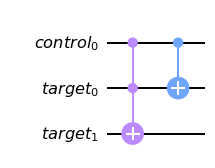

In [3]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu = QuantumCircuit(c,t, name = 'Controlled 13^x mod 35')


cu.ccx(0,1,2)
cu.cx(0,1)

cu.draw('mpl')

The next part asked us to build a circuit that performs the following transformation:

$$
\begin{aligned}
V|00\rangle = |10\rangle \\
V|01\rangle = |11\rangle \\
V|10\rangle = |00\rangle \\
V|11\rangle = |01\rangle \\
\end{aligned}
$$
This circuit was even easier to build. Notice that the first target qubit is always remained unchanged and the second one is always fliped. Therefore, a single CNOT using the qubit that activates $V$ as control and the second target qubit as target suffices.

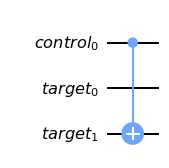

In [4]:
c = QuantumRegister(1,'control')
t = QuantumRegister(2,'target')

cu2 = QuantumCircuit(c,t)

cu2.cx(0,2)

cu2.draw('mpl')

The last part asks us to build a circuit that performs the following transformation:

$$
\begin{aligned}
W|00\rangle = |00\rangle \\
W|01\rangle = |01\rangle \\
W|10\rangle = |10\rangle \\
W|11\rangle = |11\rangle \\
\end{aligned}
$$
This was the easiest one. You can easily see that $W$ is simply the identity. Thus, no gates need to be added.

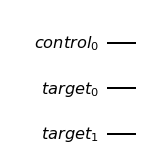

In [6]:
cu4 = QuantumCircuit(c,t)
cu4.draw('mpl')

Now we simply combine our circuits to give the result

### Final Exercise
Now we have controlled $U$, $U^2$ and $U^4$, we can combine this into a circuit that carries out the quantum part of Shor’s algorithm. The initialization part is easy: we need to put the counting register into the state $|{+}{+}{+}\rangle$ (which we can do with three H-gates) and we need the target register to be in the state $|1\rangle$ (which we mapped to the computational basis state $|00\rangle$, so we don’t need to do anything here). We'll do all this for you. _Your_ task is to create a circuit that carries out the controlled-$U$s, that will be used in-between the initialization and the inverse quantum Fourier transform. More formally, we want a circuit:$$
CU_{c_0 t}CU^2_{c_1 t}CU^4_{c_2 t}
$$Where $c_0$, $c_1$ and $c_2$ are the three qubits in the ‘counting’ register, $t$ is the ‘target’ register, and $U$ is as defined in the first part of this exercise. In this notation, $CU_{a b}$ means $CU$ is controlled by $a$ and acts on $b$. An easy solution to this is to simply combine the circuits `cu`, `cu2` and `cu4` that you created above, but you will most likely find a more efficient circuit that has the same behavior!

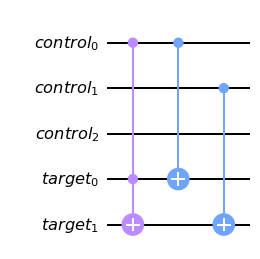

In [9]:
cqr = QuantumRegister(3, 'control')
tqr = QuantumRegister(2, 'target')
cux = QuantumCircuit(cqr,tqr)

solutions = [cu, cu2, cu4]

for i in range(3):
    cux = cux.compose(solutions[i], [cqr[i], tqr[0], tqr[1]])
    
cux.draw('mpl')

In [10]:
cux = transpile(cux, basis_gates = ['cx','u'])

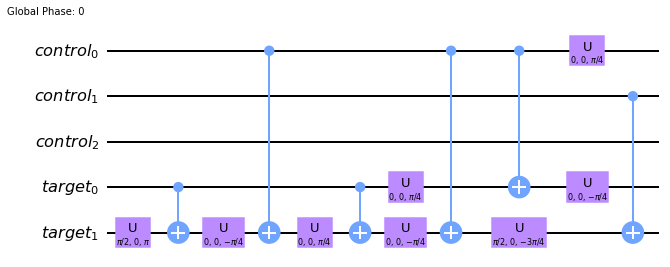

In [11]:
cux.draw(output='mpl')

## Using it to Factorize 35
The code cell below takes your submission for the exercise and uses it to create a circuit that will give us $\tfrac{s}{r}$, where $s$ is a random integer between $0$ and $r-1$, and $r$ is the period of the function $f(x) = 13^x \bmod 35$.

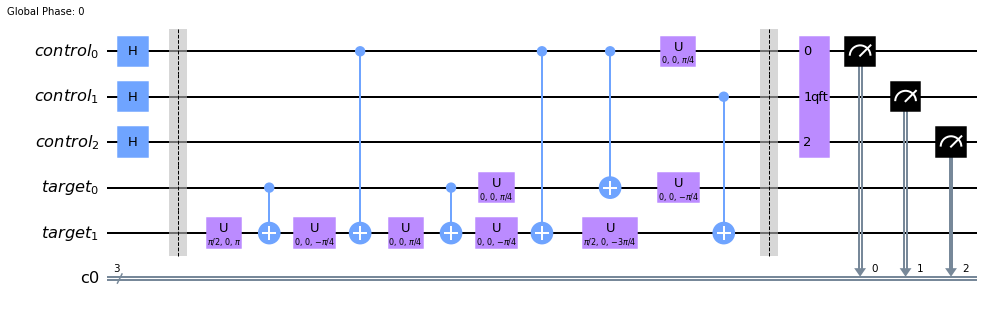

In [12]:
from qiskit.circuit.library import QFT
from qiskit import ClassicalRegister
# Create the circuit object
cr = ClassicalRegister(3)
shor_circuit = QuantumCircuit(cqr, tqr, cr)

# Initialise the qubits
shor_circuit.h(cqr)

shor_circuit.barrier()

# Add your circuit
shor_circuit = shor_circuit.compose(cux)

shor_circuit.barrier()

# Perform the inverse QFT and extract the output
shor_circuit.append(QFT(3, inverse=True), cqr)
shor_circuit.measure(cqr, cr)
shor_circuit.draw('mpl')

In [13]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram
qasm_sim = Aer.get_backend('aer_simulator')
tqc = transpile(shor_circuit, basis_gates=['u', 'cx'], optimization_level=3)
print(f"circuit depth: {tqc.depth()}")
print(f"circuit contains {tqc.count_ops()['cx']} CNOTs")

circuit depth: 28
circuit contains 15 CNOTs


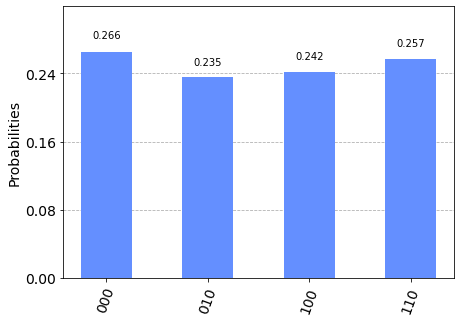

In [14]:
counts = qasm_sim.run(tqc).result().get_counts()
plot_histogram(counts)

Assuming everything has worked correctly, we should see equal probability of measuring the numbers $0$, $2$, $4$ and $8$. This is because phase estimation gives us $2^n \cdot \tfrac{s}{r}$, where $n$ is the number of qubits in our counting register (here $n = 3$, $s$ is a random integer between $0$ and $r-1$, and $r$ is the number we're trying to calculate). Let's convert these to fractions that tell us $s/r$ (this is something we can easily calculate classically):

In [15]:
from fractions import Fraction
n = 3  # n is number of qubits in our 'counting' register
# Cycle through each measurement string
for measurement in counts.keys():
    # Convert the binary string to an 'int', and divide by 2^n
    decimal = int(measurement, 2)/2**n
    # Use the continued fractions algorithm to convert to form a/b
    print(Fraction(decimal).limit_denominator())

3/4
1/4
1/2
0


We can see the denominator of some of the results will tell us the correct answer $r = 4$. We can verify $r=4$ quickly:

In [16]:
13**4 % 35

1

So how do we get the factors from this? There is then a high probability that the greatest common divisor of $N$ and either $a^{r/2}-1$ or $a^{r/2}+1$ is a factor of $N$, and the greatest common divisor is also something we can easily calculate classically.

In [17]:
from math import gcd # Greatest common divisor
for x in [-1, 1]:
    print(f"Guessed factor: {gcd(13**(4//2)+x, 35)}")

Guessed factor: 7
Guessed factor: 5


### Running on ibmq_santiago

We promised this would run on Santiago, so here we will show you how to do that. In this example we will use a simulated Santiago device for convenience, but you can switch this out for the real device if you want:


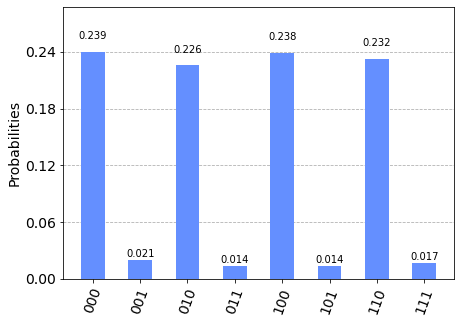

In [19]:

from qiskit.test.mock import FakeSantiago
from qiskit import assemble
from qiskit.visualization import plot_histogram
santiago = FakeSantiago()
real_device = False

## Uncomment this code block to run on the real device
#from qiskit import IBMQ
#IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#santiago = provider.get_backend('ibmq_santiago')
#real_device = True

# We need to transpile for Santiago
tqc = transpile(shor_circuit, santiago, optimization_level=3)

if not real_device:
    tqc = assemble(tqc)

# Run the circuit and print the counts
counts = santiago.run(tqc).result().get_counts()
plot_histogram(counts)


If your score was low enough, you should see we have a high probability of measuring $0$, $2$, $4$ or $8$ as we saw with the perfect simulation. You will see some extra results due to inaccuracies in the processor and unwanted things interacting with our qubits. This 'noise' gets worse the longer our circuit is, as longer computation time means more time for unwanted interactions, and more gates means more potential errors. This is why we needed to cheat to create the smallest circuit possible.